In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pylab
pylab.rcParams['figure.figsize'] = (22.0, 11.0)

In [2]:
niwot = pd.read_csv('/RHESSys/Comocreek/barnhatb/clim/niwot_snowtel/niwot_snotel_daily.csv', header = 'infer', skiprows = 1)
niwot.index = pd.DatetimeIndex(niwot.Date)

In [3]:
niwot.columns = ['date','swe','precip_accum','ATmax','ATmin','ATave','precip']

In [4]:
niwot.describe()

,swe,precip_accum,ATmax,ATmin,ATave,precip
count,12321.000000,12321.000000,8909.000000,8967.000000,8981.000000,12299.000000
mean,4.278865,15.432278,48.894376,24.424891,35.338158,0.087706
std,5.060075,10.555857,17.753493,13.416471,14.390675,0.192746
min,0.000000,0.000000,-9.000000,-54.000000,-13.000000,0.000000
25%,0.000000,6.000000,35.000000,15.000000,25.000000,0.000000
50%,1.900000,14.500000,49.000000,26.000000,35.000000,0.000000
75%,7.800000,24.500000,63.000000,34.000000,47.000000,0.100000
max,21.100000,41.700000,116.000000,57.000000,67.000000,3.000000


In [5]:
niwot.head()

,date,swe,precip_accum,ATmax,ATmin,ATave,precip
1980-10-01,1980-10-01,0,0,NaN,NaN,NaN,0
1980-10-02,1980-10-02,0,0,NaN,NaN,NaN,0
1980-10-03,1980-10-03,0,0,NaN,NaN,NaN,0
1980-10-04,1980-10-04,0,0,NaN,NaN,NaN,0
1980-10-05,1980-10-05,0,0,NaN,NaN,NaN,0


In [6]:
niwot.tail()

,date,swe,precip_accum,ATmax,ATmin,ATave,precip
2014-06-21,2014-06-21,0,19.3,65,36,52,NaN
2014-06-22,2014-06-22,0,19.0,63,40,49,NaN
2014-06-23,2014-06-23,0,18.6,65,36,49,NaN
2014-06-24,2014-06-24,0,18.3,67,36,50,NaN
2014-06-25,2014-06-25,0,17.9,72,40,54,NaN


In [7]:
strt = '1993-01-01' # set start of the timeseries

# Interpolate the data

In [8]:
niwot.loc[np.isnan(niwot.precip)==True,'precip']=0

In [9]:
niwot = niwot.interpolate(method='time')

In [10]:
# convert units

In [11]:
niwot.precip = niwot.precip*0.0254 # convert inches to meters

In [12]:
niwot.ATmax = (niwot.ATmax-32.)*(5./9) # F to C

In [13]:
niwot.ATmin = (niwot.ATmin-32.)*(5./9) # F to C

In [14]:
niwot.ATave = (niwot.ATave-32.)*(5./9) # F to C

In [15]:
niwot.tail()

,date,swe,precip_accum,ATmax,ATmin,ATave,precip
2014-06-21,2014-06-21,0,19.3,18.333333,2.222222,11.111111,0
2014-06-22,2014-06-22,0,19.0,17.222222,4.444444,9.444444,0
2014-06-23,2014-06-23,0,18.6,18.333333,2.222222,9.444444,0
2014-06-24,2014-06-24,0,18.3,19.444444,2.222222,10.000000,0
2014-06-25,2014-06-25,0,17.9,22.222222,4.444444,12.222222,0


# Save the Timer series as a pickle object

In [16]:
niwot.to_pickle('/RHESSys/ComoCreek_new/clim/niwot_snotel.pcl')

## Make Plots

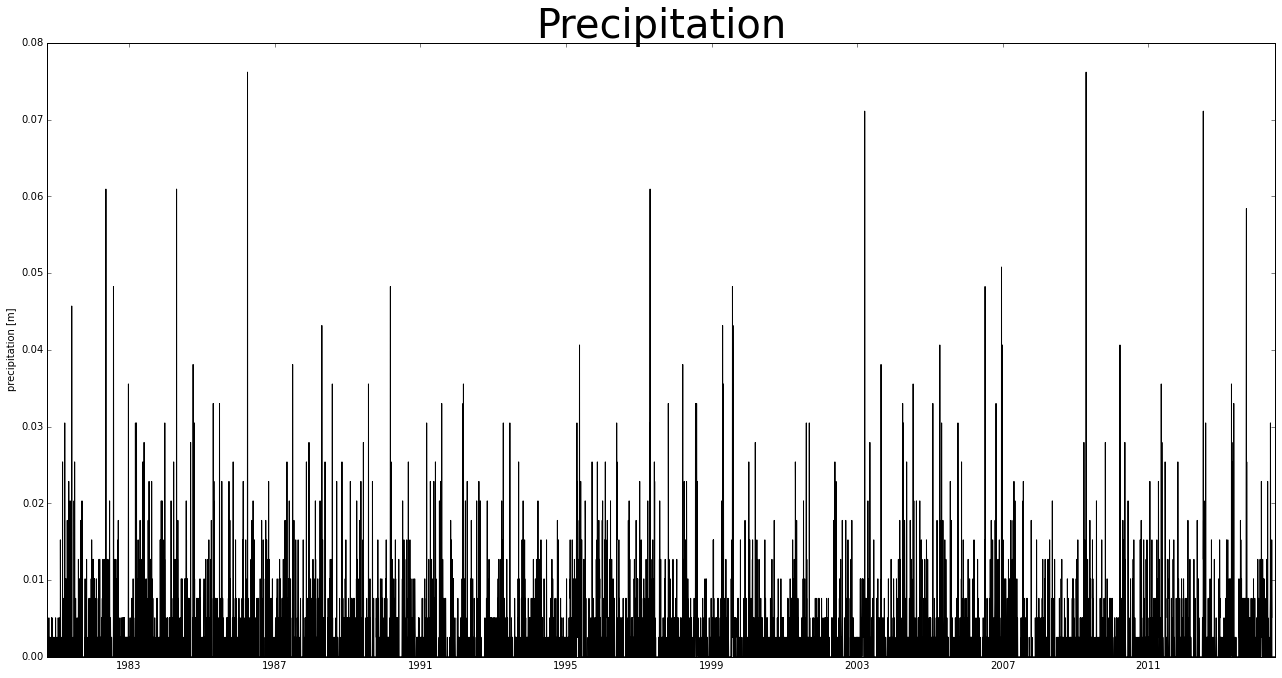

In [26]:
plt.plot_date(niwot.index, niwot.precip, 'k-')
plt.ylabel("precipitation [m]")
plt.title("Precipitation",fontsize=40)

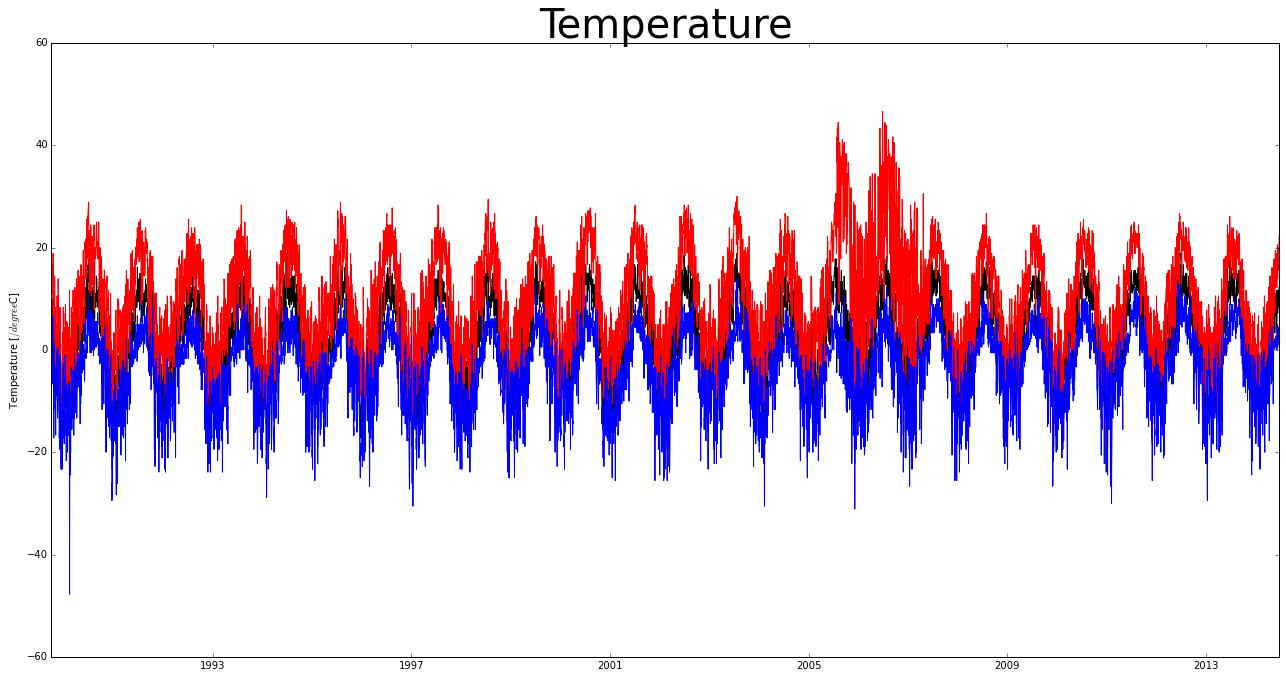

In [28]:
plt.plot_date(niwot.index, niwot.ATave, 'k-')
plt.plot_date(niwot.index, niwot.ATmax, 'r-')
plt.plot_date(niwot.index, niwot.ATmin, 'b-')
plt.ylabel("Temperature [$\degree$C]")
plt.title("Temperature",fontsize=40)

In [43]:
strt='1989-10-01'
nd = '2013-10-15'
Tmin = niwot.loc[strt:nd,'ATmin'].as_matrix()
Tmax = niwot.loc[strt:nd,'ATmax'].as_matrix()
P = niwot.loc[strt:nd,'precip'].as_matrix()

n = len(Tmin)

Tmin = np.reshape(Tmin,[n,1])
Tmax = np.reshape(Tmax,[n,1])
P = np.reshape(P,[n,1])

In [44]:
# save as txt
header='1989 10 1'
np.savetxt('/RHESSys/ComoCreek_new/clim/niwot_snotel.tmin',Tmin, header=header,comments='',fmt='%.5f')
np.savetxt('/RHESSys/ComoCreek_new/clim/niwot_snotel.tmax',Tmax,header=header,comments='',fmt='%.5f')
np.savetxt('/RHESSys/ComoCreek_new/clim/niwot_snotel.rain',P,header=header,comments='',fmt='%.10f')